# Project: Investigate a Dataset - [TMDb movie data]
Table of Contents:
Introduction

*   Introduction 
*   Data Wrangling
*   Exploratory Data Analysis
*   Conclusions

# Introduction
**Dataset Description**

*Dataset selected*:TMDb movie data This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

*Columns in the dataset:*
id - unique id of the movies in the dataset
imdb_id - unique id of the movies in the The Movie Database(TMDb)
popularity - popularity measure of each movie
budget - budget for making each movie	
revenue	- revenue made from the movie viewed by the audience 
original_title	- original title of the movie
cast - cast that acted in the movie	
homepage - link to website where the movie is located	
director - director who directed the movie	
tagline - tagline used to market the movie	
keywords - keywords used throughout the movie and match the movie theme/ genre	
overview - short description of the movie's storyline	
runtime - how much time it run for people to watch	
genres - the movie genre	
production_companies - companies which produced the movies	
release_date - date which the movie was released	
vote_count - total count of votes
vote_average - average of vote count	
release_year - year which the movie was released 
budget_adj	- budget adj 
revenue_adj - revenue adj

# Question(s) for Analysis


1. Which genres are most popular from year to year? 
2. Which Genres have the highest average revenue over the years?
3. Who are the most popular cast members in highest grossing movies?



In [ ]:
#import python packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import io
from google.colab import files

# Data Wrangling
General Properties

In [ ]:
#load dataset
uploaded = files.upload()

Saving tmdb-movies.csv to tmdb-movies.csv


In [ ]:
#print out dataset. Perform operations to inspect data
df = pd.read_csv(io.BytesIO(uploaded.get('tmdb-movies.csv')))
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# Shape of dataset
df.shape

(10866, 21)

In [ ]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
# Displaying the number of missing values for each column . 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
# Checking for any duplicated rows:
df.duplicated().sum()

1

In [ ]:
# display the duplicated data
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


**Data Summary**

In [ ]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Data Cleaning**

In [ ]:
# Display the column indexes
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

1. Drop data that isnt relevant for analysis


In [ ]:
df.drop(
    ['homepage','tagline','overview'\
     ,'imdb_id','id','release_date'], inplace = True, axis = 1)

In [ ]:
# check for changes
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

2.Drop missing values (NANs)

In [ ]:
df.dropna(inplace = True)

3.drop rows that contain zeros values in (revenue_adj,budget_adj,runtime)

In [ ]:
zero_data = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]
df.drop(zero_data.index,inplace=True)


In [ ]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# info of the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3678 non-null   float64
 1   budget                3678 non-null   int64  
 2   revenue               3678 non-null   int64  
 3   original_title        3678 non-null   object 
 4   cast                  3678 non-null   object 
 5   director              3678 non-null   object 
 6   keywords              3678 non-null   object 
 7   runtime               3678 non-null   int64  
 8   genres                3678 non-null   object 
 9   production_companies  3678 non-null   object 
 10  vote_count            3678 non-null   int64  
 11  vote_average          3678 non-null   float64
 12  release_year          3678 non-null   int64  
 13  budget_adj            3678 non-null   float64
 14  revenue_adj           3678 non-null   float64
dtypes: float64(4), int64

In [ ]:
# Descriptive statistics of the cleaned dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3678.000000,3.678000e+03,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3.678000e+03,3.678000e+03
mean,1.225880,3.811245e+07,1.114105e+08,109.556552,547.583197,6.182436,2001.094345,4.538375e+07,1.420504e+08
std,1.498729,4.267018e+07,1.793474e+08,19.854487,894.862105,0.789743,11.379792,4.518652e+07,2.194983e+08
min,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00
25%,0.481364,1.000000e+07,1.489561e+07,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.038559e+07
50%,0.829585,2.500000e+07,4.804570e+07,106.000000,218.500000,6.200000,2004.000000,3.105061e+07,6.548580e+07
75%,1.410847,5.000000e+07,1.297594e+08,119.750000,595.500000,6.700000,2010.000000,6.214554e+07,1.704382e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09



Sorting data release data into decades for Exploratory analysis

In [ ]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)

In [ ]:
df.release_year.value_counts()

2000s    1444
2010s     816
1990s     778
1980s     415
1970s     144
1960s      77
Name: release_year, dtype: int64

Separate the data contained in Cast & Genres columns into multiple values

In [ ]:
# Columns like cast & genres contain several values separated by the "|" , so we separate these values to make a more appropriate analysis.
def seprate_values(col):
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [ ]:
df_cast = seprate_values('cast')
df_gen = seprate_values('genres')

df['cast'],df['genres']=df_cast['cast_1'],df_gen['genres_1']

In [ ]:
display(df['cast'].value_counts().nlargest(10))
print('-'*60)
display(df['genres'].value_counts().nlargest(10))

Nicolas Cage             36
Bruce Willis             32
Johnny Depp              30
Denzel Washington        28
Tom Hanks                28
Robert De Niro           27
Tom Cruise               27
Sylvester Stallone       26
Arnold Schwarzenegger    26
Adam Sandler             23
Name: cast, dtype: int64

------------------------------------------------------------


Drama              838
Comedy             743
Action             663
Adventure          302
Horror             264
Crime              170
Thriller           155
Fantasy            107
Animation          100
Science Fiction     95
Name: genres, dtype: int64

# Exploratory Data Analysis

Research Question 1 (Which genres are most popular from year to year? )

In [ ]:
df.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,12,15,1,10,6,0,18,1,0,2,3,2,1,0,1,0,0,1,4
1970s,28,15,2,18,12,0,33,1,2,0,18,2,2,1,7,0,2,0,1
1980s,71,49,5,83,17,1,70,4,21,0,50,4,1,4,19,0,13,3,0
1990s,154,52,15,168,43,2,172,7,28,4,49,5,9,18,18,1,31,1,1
2000s,254,121,43,328,56,15,343,15,38,4,91,9,15,22,24,0,52,7,7
2010s,142,50,34,135,36,5,201,11,18,7,53,6,7,17,26,0,57,8,3


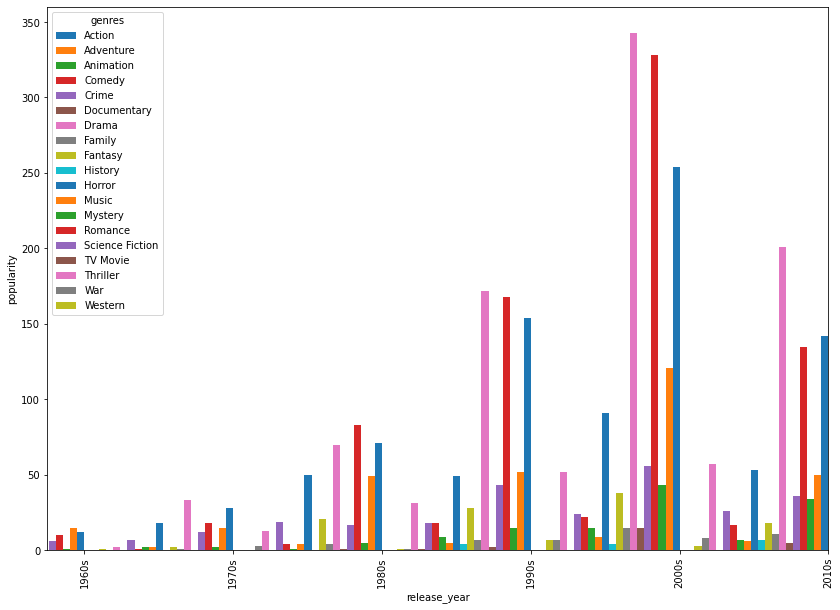

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');

The Top Three Genres for each decade are:

1960s: Adventure, Action, Drama

1970s: Action, Drama, Comedy

1980s: Action, Drama, Comedy

1990s: Drama, Comedy, Action

2000s: Drama, Comedy, Action

2010s: Drama, Comedy, Action

Research Question 2 ( Which genres have the highest average revenue over the years? )

In [ ]:
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,2.731441e+08,3.839599e+08,3.126928e+08,2.481140e+08,1.386940e+08,NaN,2.861995e+08,1.345551e+09,NaN,3.870526e+08,1.017132e+08,3.226543e+08,8.733419e+07,NaN,3.555466e+08,NaN,NaN,6.895860e+07,1.230217e+08
1970s,1.721027e+08,5.681115e+08,9.490723e+07,2.467087e+08,1.335606e+08,NaN,2.876026e+08,2.154078e+07,1.578399e+08,NaN,2.555789e+08,4.563258e+08,5.060207e+07,1.557275e+08,2.671283e+08,NaN,7.168150e+07,NaN,4.179465e+07
1980s,1.164587e+08,2.360756e+08,1.472569e+08,1.117692e+08,5.620388e+07,1.045097e+07,1.274191e+08,1.223186e+08,2.143721e+08,NaN,6.541418e+07,3.549937e+07,1.847564e+07,2.170476e+08,1.909452e+08,NaN,7.440646e+07,4.775132e+07,NaN
1990s,1.591436e+08,2.747033e+08,2.719669e+08,1.161685e+08,1.559189e+08,4.651366e+07,1.141706e+08,4.013539e+08,1.386449e+08,1.953159e+08,6.254429e+07,1.213227e+08,1.420341e+08,1.740734e+08,1.668681e+08,5.838910e+07,1.008899e+08,2.146450e+07,2.473345e+08
2000s,1.378395e+08,3.209460e+08,3.232371e+08,9.209114e+07,7.116418e+07,2.964297e+07,7.606509e+07,2.374571e+08,2.279062e+08,2.142948e+08,7.703031e+07,1.038387e+08,7.809762e+07,9.151797e+07,1.653013e+08,NaN,1.223091e+08,1.459111e+08,8.272509e+07
2010s,2.470708e+08,3.070952e+08,3.291456e+08,8.198125e+07,7.558890e+07,3.180000e+07,5.228539e+07,2.365620e+08,2.158465e+08,6.351185e+07,5.619986e+07,8.124394e+07,6.680714e+07,1.181990e+08,3.181951e+08,NaN,6.937397e+07,1.945616e+08,1.641861e+08


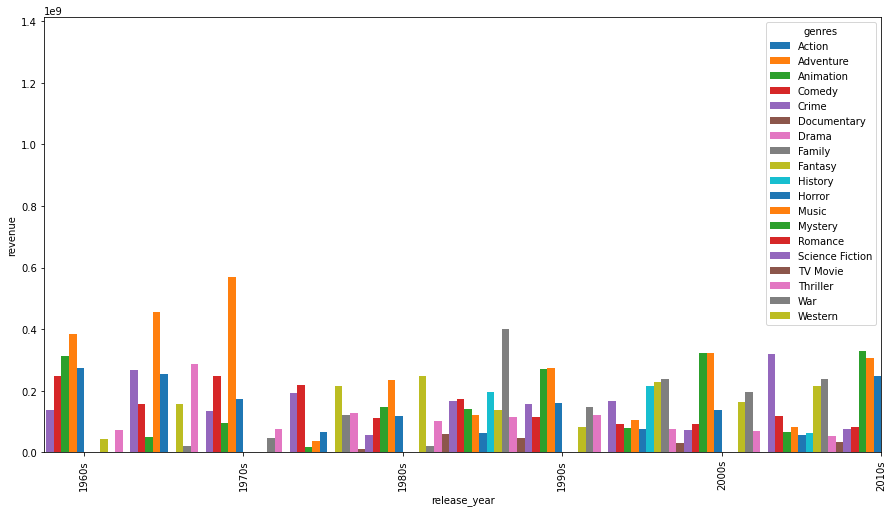

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('revenue');

The Highest Grossing Revenue genre over the years are:

1960s: Adventure, Animation, Action.

1970s: Adventure, Drama, Music.

1980s: Adventure, Fantasy, Romance.

1990s: Family, Western, Adventure, Animation.

2000s: Animation, Adventure, Family.

2010s: Animation, Adventure, Science Fiction.

Research Question 3: (Who are the most popular cast members in highest grossing movies?)

Text(0.5, 1.0, 'Most frequent cast members in popular movies')

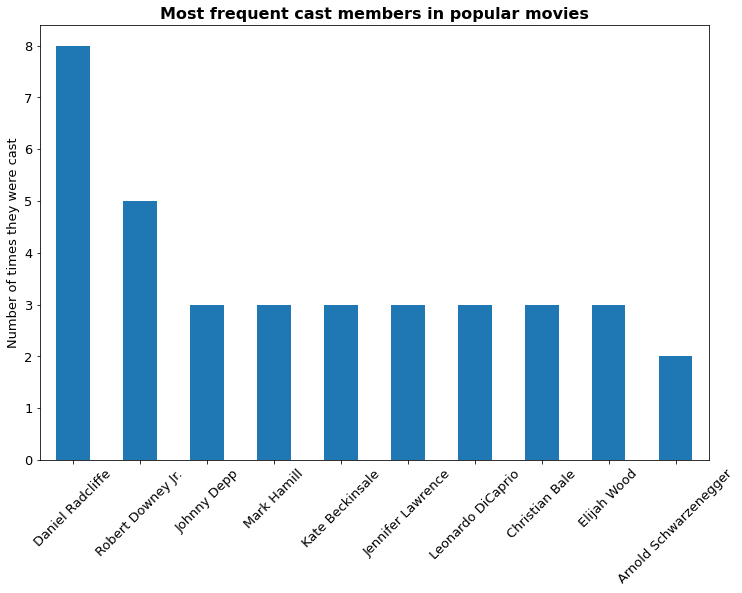

In [ ]:
# Counting most popular cast members in popular movies:
top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_cast = pd.Series(top_100_df['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_top_100 = top_100_cast.value_counts(ascending=False).head(10)
frequent_cast_in_top_100.plot(kind='bar', figsize=(12, 8));
plt.xticks(rotation = 45, fontsize = 13) # labels for the x-axis
plt.yticks(fontsize = 13) # y-axis
plt.ylabel("Number of times they were cast", fontsize = 13) #title for the y-axis
plt.title("Most frequent cast members in popular movies", fontsize = 16, fontweight = "bold") #title for the chart


# Conclusions

**Data Limitations**
1. Alot of the data columns are irrelevant for analysis
2. There are several missing values in the dataset
3. The 0 values are treated as missing data

***Findings and results***

Question 1: Interest in movie genres varies overtime but the Most popular genres over the years are Drama, Action and Comedy.

Question 2: Adevnture is the most common genre in highest grossing revenue over the years.

Question 3: The results of this question mean that the appearance of one of these popular actors could contribute to the success of the movie.
